In [1]:
%matplotlib notebook
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from fridge import Fridge
from tes import TES
from QET import QET
from detector import Detector
from PD4 import PD4
from electronics import Electronics
from absorber import Absorber
from simulated_noise import simulate_noise
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from MaterialProperties import TESMaterial

In [2]:
printing = False 
fSnolab = Fridge("SNOLAB", 20e-3, 145e-3, 900e-3, 4.8, 0)
# Absorber: Silicon. Height 1mm. Radius 38.1mm. W safety 3mm. 
absorber = Absorber("Si", "cylinder", 1e-3, 38.1e-3, 3e-3, printing) # same as matlab
eSnolab = Electronics(fSnolab, fSnolab.get_TCP(), fSnolab.get_TMC())
eSLAC = Electronics(fSnolab, fSnolab.get_TMC(), fSnolab.get_TMC(), 5e-3, 6e-3, 25e-9, 25e-9, 4e-12)

tungsten = TESMaterial()

In [3]:
#PD2 ~Upgrade~ input values 
tes_l = 140e-6 # same as matlab
tes_w = 3e-6 # this is what we want, Fabrication is questionable (PD2 turned out to be 3.5)
# standard tes width we can do at Stanford: 2.5um (Matt will check)
# at TAMU tes width can do 3 um 
#foverlap = 1.2 # same as matlab (why greater than 1??)
#foverlap = 0.8 # same as matlab (why greater than 1??)
n_fin = 6
#l_fin = 200e-6 # same as matlab
h_fin = 600e-9 # same as matlab
sigma = tungsten._gPep_v
T_eq = -100
res_n = 300e-3 # want 100 mOhm 
ahole = 7e-7*7e-6
l_overlaps = [4e-6, 6e-6, 8e-6, 10e-6, 12e-6, 14e-6, 16e-6, 18e-6, 20e-6, 22e-6, 30e-6] # radius of fin connector
l_fins = [ 75e-6,  125e-6, 150e-6, 175e-6,  225e-6,  275e-6]
l_fins_mu = []
l_overlaps_mu = []
for l_o in l_overlaps:
    l_overlaps_mu.append(l_o*(10**6))
for l_f in l_fins:
    l_fins_mu.append(l_f*(10**6))

<IPython.core.display.Javascript object>


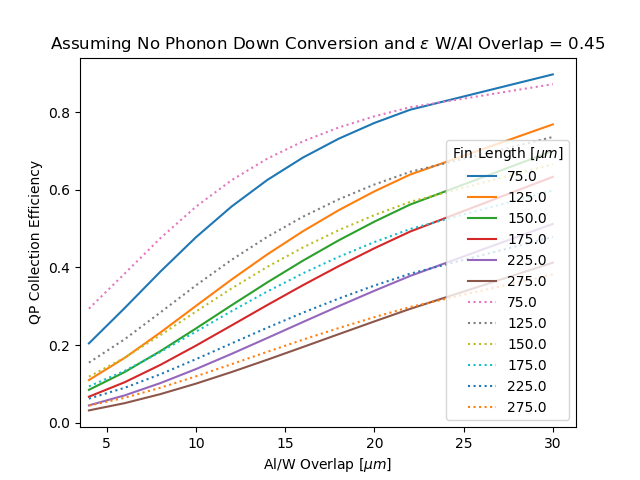

In [5]:
f, ax = plt.subplots(1)
types = [0,1]

for t in types: 
    for l_f in l_fins:
        eff = [[],[]]
        for l_over in l_overlaps: 
            tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
            qet = QET( l_f, h_fin, tes, ahole)
            det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, t)
            eff[t].append(qet._eQPabsb) 
        fin_string = "{}"
        if t==0: ax.plot(l_overlaps_mu, eff[t], label = fin_string.format(l_f*(10**6)),linestyle = '-' )
        elif t==1: ax.plot(l_overlaps_mu, eff[t], label = fin_string.format(l_f*(10**6)) , linestyle = ':')
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("QP Collection Efficiency")
plt.show()

<IPython.core.display.Javascript object>


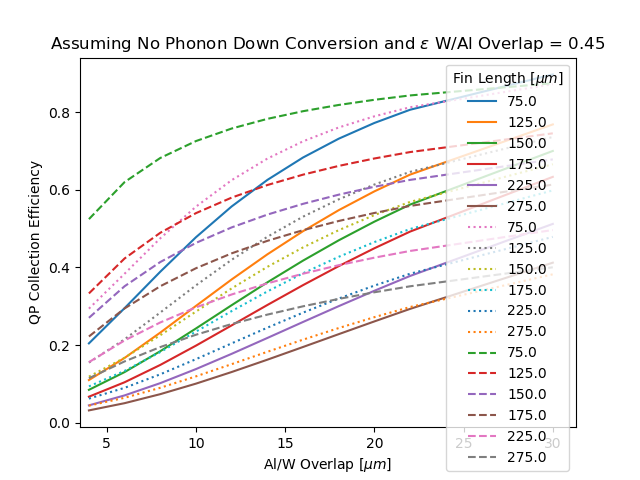

In [5]:
f, ax = plt.subplots(1)
types = [0,1,2]

for t in types: 
    for l_f in l_fins:
        eff = [[],[],[]]
        for l_over in l_overlaps: 
            tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
            qet = QET( l_f, h_fin, tes, ahole)
            det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, t)
            eff[t].append(qet._eQPabsb) 
        fin_string = "{}"
        if t==0: ax.plot(l_overlaps_mu, eff[t], label = fin_string.format(l_f*(10**6)),linestyle = '-' )
        if t==1: ax.plot(l_overlaps_mu, eff[t], label = fin_string.format(l_f*(10**6)) , linestyle = ':')
        if t==2: ax.plot(l_overlaps_mu, eff[t], label = fin_string.format(l_f*(10**6)) , linestyle = '--')
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("QP Collection Efficiency")
plt.show()

<IPython.core.display.Javascript object>


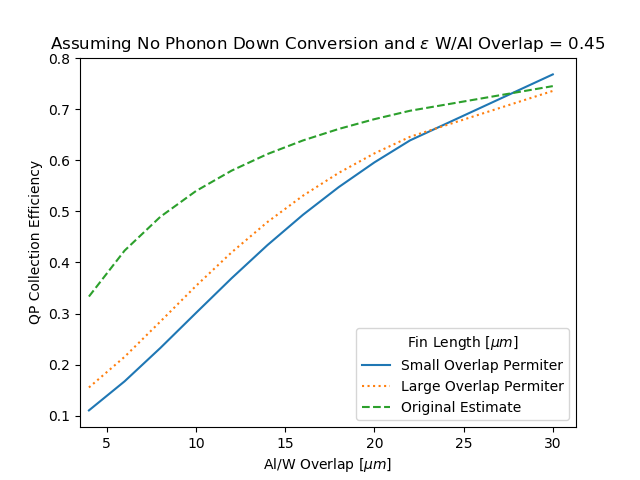

Type  0
Type  1
Type  2


In [6]:
f, ax = plt.subplots(1)
types = [0,1,2]
l_f = 125e-6 
for t in types: 
    print("Type ", t)
    eff = [[],[],[]]
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
        qet = QET( l_f, h_fin, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, t)
        eff[t].append(qet._eQPabsb) 
    if t == 0: fin_string = "Small Overlap Permiter"
    if t == 1: fin_string = "Large Overlap Permiter"
    if t == 2: fin_string = "Original Estimate"
    if t==0: ax.plot(l_overlaps_mu, eff[t], label = fin_string.format(l_f*(10**6)),linestyle = '-' )
    if t==1: ax.plot(l_overlaps_mu, eff[t], label = fin_string.format(l_f*(10**6)) , linestyle = ':')
    if t==2: ax.plot(l_overlaps_mu, eff[t], label = fin_string.format(l_f*(10**6)) , linestyle = '--')
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("QP Collection Efficiency")
plt.show()

<IPython.core.display.Javascript object>


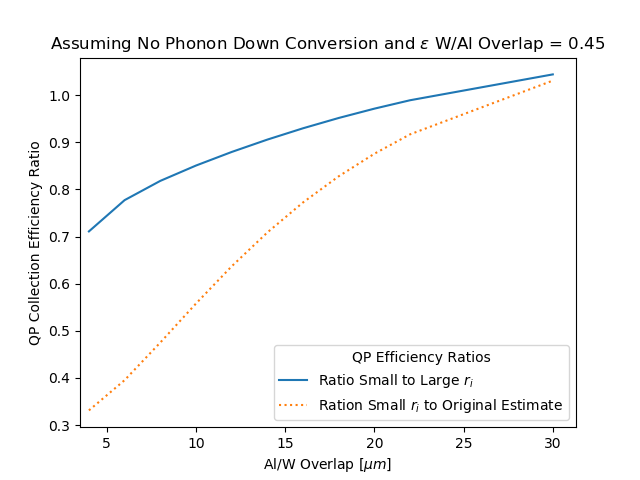

TYPE  0
TYPE  1
TYPE  2


In [7]:
f, ax = plt.subplots(1)
types = [0,1,2]
l_f = 125e-6 
eff = [[],[],[]]
for t in types: 
    print("TYPE ", t)
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
        qet = QET( l_f, h_fin, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, t)
        eff[t].append(qet._eQPabsb) 
ratio01 = [i/j for i,j in zip(eff[0], eff[1])]
ratio02 = [k/l for k,l in zip(eff[0], eff[2])]
ax.plot(l_overlaps_mu, ratio01, label = "Ratio Small to Large $r_{i}$",linestyle = '-' )
ax.plot(l_overlaps_mu, ratio02, label = "Ration Small $r_{i}$ to Original Estimate" , linestyle = ':')
plt.legend(title = "QP Efficiency Ratios")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("QP Collection Efficiency Ratio")
plt.show()

In [11]:
#PD2 ~Upgrade~ input values 
tes_l = 140e-6 # same as matlab
tes_w = 2.5e-6 # this is what we want, Fabrication is questionable (PD2 turned out to be 3.5)
# standard tes width we can do at Stanford: 2.5um (Matt will check)
# at TAMU tes width can do 3 um 
#foverlap = 1.2 # same as matlab (why greater than 1??)
#foverlap = 0.8 # same as matlab (why greater than 1??)
n_fin = 6
#l_fin = 200e-6 # same as matlab
h_fin = 600e-9 # same as matlab
sigma = tungsten._gPep_v
T_eq = -100
res_n = 200e-3 # want 100 mOhm 
ahole = 7e-7*7e-6

<IPython.core.display.Javascript object>


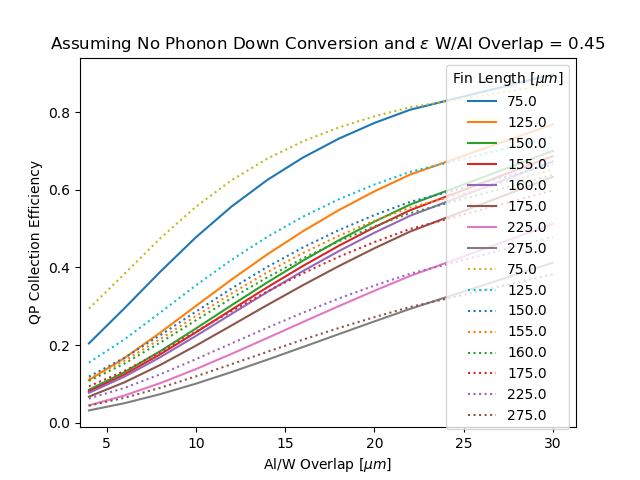

In [12]:
f, ax = plt.subplots(1)
types = [0,1]

for t in types: 
    for l_f in l_fins:
        eff = [[],[]]
        for l_over in l_overlaps: 
            tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
            qet = QET( l_f, h_fin, tes, ahole)
            det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, t)
            eff[t].append(qet._eQPabsb) 
        fin_string = "{}"
        if t==0: ax.plot(l_overlaps_mu, eff[t], label = fin_string.format(l_f*(10**6)),linestyle = '-' )
        elif t==1: ax.plot(l_overlaps_mu, eff[t], label = fin_string.format(l_f*(10**6)) , linestyle = ':')
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("QP Collection Efficiency")
plt.show()

<IPython.core.display.Javascript object>


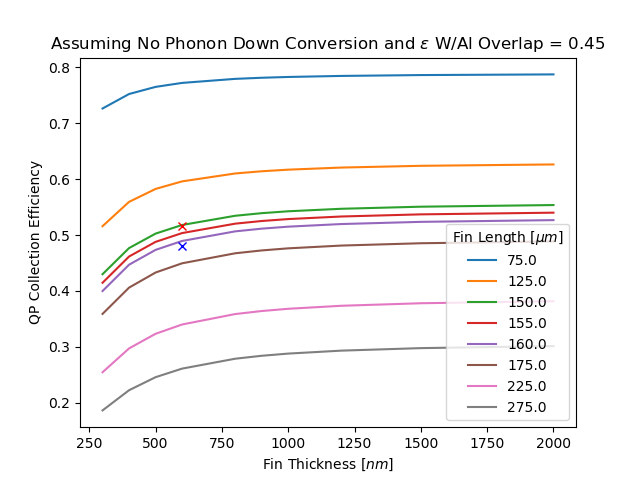

In [13]:
f, ax = plt.subplots(1)

h_fins = [300e-9,400e-9, 500e-9, 600e-9, 800e-9, 900e-9, 1000e-9,1200e-9,1500e-9, 2000e-9]

h_fins_nm = []
for h in h_fins:
    h_fins_nm.append(h*(10**9))
    
l_fins = [ 75e-6,  125e-6, 150e-6, 155e-6, 160e-6, 175e-6,  225e-6,  275e-6]
l_fins_mu = []
for l_f in l_fins:
    l_fins_mu.append(l_f*(10**6))

l_over = 20e-6
for l_f in l_fins:
    eff = []
    for h_f in h_fins: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
        qet = QET( l_f, h_f, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        eff.append(qet._eQPabsb) 
    fin_string = "{}"
    ax.plot(h_fins_nm, eff, label = fin_string.format(l_f*(10**6)),linestyle = '-' )
ax.plot(600, 0.517, 'r', marker = 'x')
ax.plot(600, 0.48, 'b', marker = 'x')
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
#ax.set_xlim(xmin =3.5)
ax.set_xlabel("Fin Thickness [$n m$]")
ax.set_ylabel("QP Collection Efficiency")
plt.show()

<IPython.core.display.Javascript object>


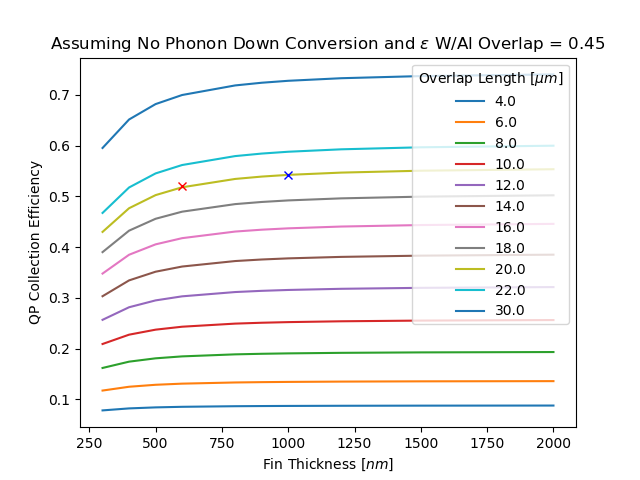

0.5179517507078939
0.5424325364282542


In [14]:
f, ax = plt.subplots(1)

l_f = 150e-6

for l_over in l_overlaps:
    eff = []
    for h_f in h_fins:
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
        qet = QET(l_f, h_f, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        eff.append(qet._eQPabsb) 
        if l_over == 20e-6 and h_f == 600e-9:
            print(qet._eQPabsb)
        if l_over == 20e-6 and h_f == 1000e-9:
            print(qet._eQPabsb)
    fin_string = "{}"
    ax.plot(h_fins_nm, eff, label = fin_string.format(l_over*(10**6)),linestyle = '-' )
ax.plot(600, .52, 'r', marker = 'x')
ax.plot(1000, .543, 'b', marker = 'x')
plt.legend(title = "Overlap Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
#ax.set_xlim(xmin =3.5)
ax.set_xlabel("Fin Thickness [$nm$]")
ax.set_ylabel("QP Collection Efficiency")
plt.show()

<IPython.core.display.Javascript object>


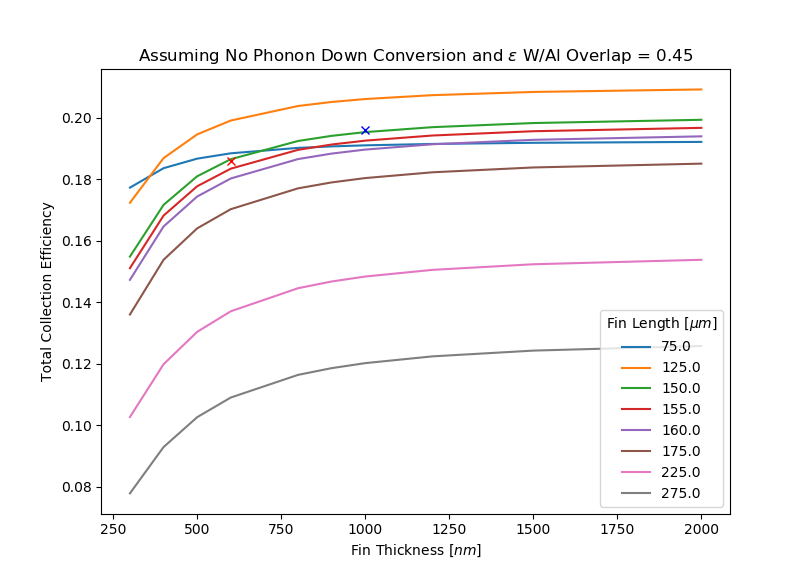

0.18657356324649488
0.19539188931003088


In [15]:
f, ax = plt.subplots(1)

h_fins = [300e-9,400e-9, 500e-9, 600e-9, 800e-9, 900e-9, 1000e-9,1200e-9,1500e-9, 2000e-9]

h_fins_nm = []
for h in h_fins:
    h_fins_nm.append(h*(10**9))

l_over = 20e-6
for l_f in l_fins:
    eff = []
    for h_f in h_fins: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
        qet = QET( l_f, h_f, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        eff.append(det._eEabsb) 
        if l_f == 150e-6 and h_f == 600e-9:
            print(det._eEabsb)
        if l_f == 150e-6 and h_f == 1000e-9:
            print(det._eEabsb)
    fin_string = "{}"
    ax.plot(h_fins_nm, eff, label = fin_string.format(l_f*(10**6)),linestyle = '-' )
ax.plot(600, .186, 'r', marker = 'x')
ax.plot(1000, .196, 'b', marker = 'x')
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
#ax.set_xlim(xmin =3.5)
ax.set_xlabel("Fin Thickness [$n m$]")
ax.set_ylabel("Total Collection Efficiency")
plt.show()

<IPython.core.display.Javascript object>


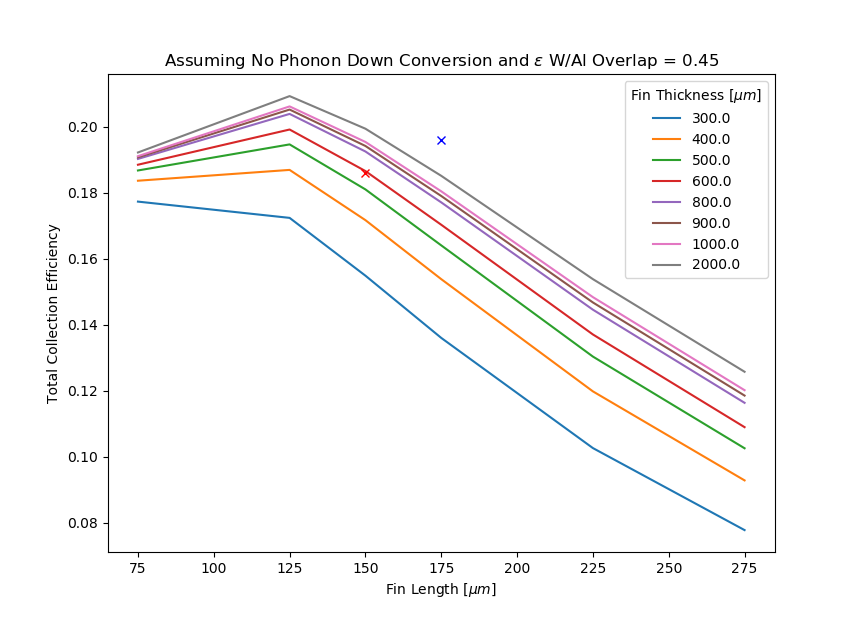

h Fin  6e-07
l Fin  0.00015
0.7971456499603208
h Fin  1e-06
l Fin  0.00015
0.7971456499603208
h Fin  1e-06
l Fin  0.000175
0.8385399216396872


In [13]:
f, ax = plt.subplots(1)

h_fins = [300e-9,400e-9, 500e-9, 600e-9, 800e-9, 900e-9, 1000e-9, 2000e-9]

h_fins_nm = []
for h in h_fins:
    h_fins_nm.append(h*(10**9))

l_over = 20e-6
for h_f in h_fins:
    eff = []
    for l_f in l_fins: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
        qet = QET( l_f, h_f, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        eff.append(det._eEabsb) 
        if h_f == 600e-9 and l_f == 150e-6:
            print("h Fin ", h_f)
            print("l Fin ", l_f)
            print(det._ePcollect)
        if h_f == 1000e-9 and l_f == 150e-6:
            print("h Fin ", h_f)
            print("l Fin ", l_f)
            print(det._ePcollect)
        if h_f == 600e-9 and l_f == 160e-6:
            print("h Fin ", h_f)
            print("l Fin ", l_f)
            print(det._ePcollect)
        if h_f == 1000e-9 and l_f == 175e-6:
            print("h Fin ", h_f)
            print("l Fin ", l_f)
            print(det._ePcollect)
    fin_string = "{}"
    ax.plot(l_fins_mu, eff, label = fin_string.format(h_f*(10**9)),linestyle = '-' )
ax.plot(150, .186, 'r', marker = 'x')
ax.plot(175, .196, 'b', marker = 'x')
plt.legend(title = "Fin Thickness [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
#ax.set_xlim(xmin =3.5)
ax.set_xlabel("Fin Length [$\mu m$]")
ax.set_ylabel("Total Collection Efficiency")
plt.show()

<IPython.core.display.Javascript object>


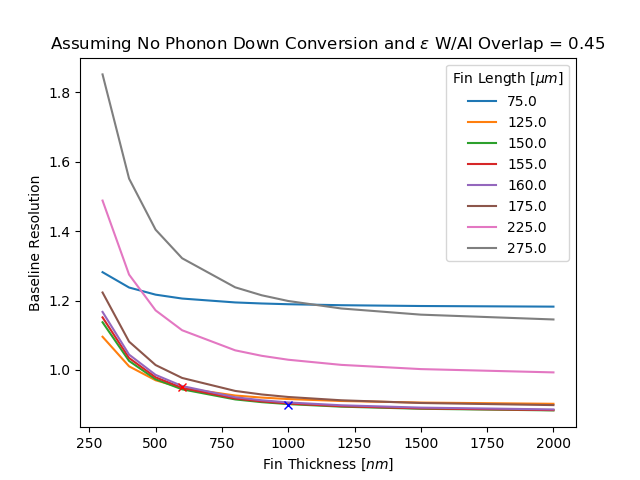

0.9017229615317792


In [16]:
f, ax = plt.subplots(1)

h_fins = [300e-9,400e-9, 500e-9, 600e-9, 800e-9, 900e-9, 1000e-9,1200e-9,1500e-9, 2000e-9]

h_fins_nm = []
for h in h_fins:
    h_fins_nm.append(h*(10**9))

l_over = 20e-6
for l_f in l_fins:
    eff = []
    for h_f in h_fins: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
        qet = QET( l_f, h_f, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        res = simulate_noise(det)
        eff.append(res) 
        if l_f == 150e-6 and h_f == 1000e-9: print(res)
    fin_string = "{}"
    ax.plot(h_fins_nm, eff, label = fin_string.format(l_f*(10**6)),linestyle = '-' )
ax.plot(600, 0.95, 'r', marker = 'x')
ax.plot(1000, 0.90, 'b', marker = 'x')
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
#ax.set_xlim(xmin =3.5)
ax.set_xlabel("Fin Thickness [$n m$]")
ax.set_ylabel("Baseline Resolution")
plt.show()

<IPython.core.display.Javascript object>


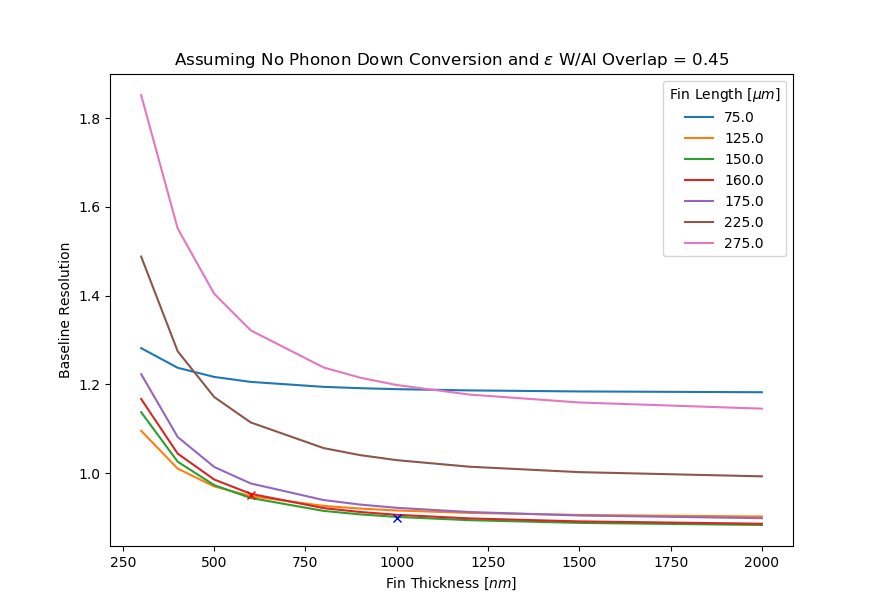

0.9017229615317792


In [19]:
f, ax = plt.subplots(1)

h_fins = [300e-9,400e-9, 500e-9, 600e-9, 800e-9, 900e-9, 1000e-9,1200e-9,1500e-9, 2000e-9]

h_fins_nm = []
for h in h_fins:
    h_fins_nm.append(h*(10**9))

l_over = 20e-6
for l_f in l_fins:
    eff = []
    for h_f in h_fins: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
        qet = QET( l_f, h_f, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        res = simulate_noise(det)
        eff.append(res) 
        if l_f == 150e-6 and h_f == 1000e-9: print(res)
    fin_string = "{}"
    ax.plot(h_fins_nm, eff, label = fin_string.format(l_f*(10**6)),linestyle = '-' )
ax.plot(600, 0.95, 'r', marker = 'x')
ax.plot(1000, 0.90, 'b', marker = 'x')
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
#ax.set_xlim(xmin =3.5)
ax.set_xlabel("Fin Thickness [$n m$]")
ax.set_ylabel("Baseline Resolution")
plt.show()